In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

### Clustering

So far we have reviewed regression tasks (using Linear Regressin) and classification (using SVMs, Naïve Bayes, and Random Forests). Recall that regression involves predicting continuous values, and classification involves predicting a class label (discrete, categorical data). Today we will talk about clustering.

Clustering is a form of unsupervised learning. Unsupervised means that we don't have a 'y' - a target / label vector that tells us what class a data item belongs to. For this, we may have a whole bunch of data that we don't know what's in there, and we just want to group the data into clusters by how similar they are.

In order to do that, we have to learn a representation of those data in some n-dimensional space, and then cluster them together in that n-dimensional space. We can then view the results of that clustering by projecting those features down to a 2- or 3-dimensional space and plotting them using something like matplotlib.

The most popular clustering algorithm is called 'k-means', and there are many variants of that family of algorithms. We'll keep it pretty simple to introduce the concept.

### k-means

K-mean, like all clustering algorithms, attempts to learn some underlying representation of our data, and then group those data into clusters. The 'k' in 'k-means' refers to the number of clusters in our data. There are methods by which we can learn the optimal number of k, which overcomes ones main weakness of the algorithm.

More specifically, k refers to the number of cluster centroids. Data items are 'clustered' based on which centroid they are closest to in that n-dimensional space. The objective of clustering algorithms such as k-means is to discover the optimal location of each cluster centroid such that the data can be partitioned into k-clusters such that the separability between the clusters is maximized. Note that the 'means' in k-means refers to the method by which we find the centroid.

k-mean starts by randomly selecting k-centroids to act as the starting point. Then the algorithm iteratively performs calculations to further refine the centroid locations. The algorithm completes either when the maximum number of iterations have been performed, or when the centroids are stable enough - meaning that they don't change their values after a specified number of iterations and the data samples don't change their assigned clusters.

### Mathematic Formation

We first observe a set of random centroids: ${c_1, c_2,...,c_k}$. Then each iteration performs the following operations:

1. Assignment

$S_i = \{x_p:||x_p - c_i||^2 \leq ||x_p - c_j||^2 \forall j, 1 \leq j \leq k\}$

In the assignment step, we assign each data sample $x_p$ to a set of data samples $S_i$ based on the cluster $c_i$ that it is closest to, based on the Euclidean distance.

2. Update

$c_i = \frac{1}{|S_{k}|}\sum_{x_j \in S_i} x_j$

In the update steps, we recalculate the cluster centroids by taking the average position of the elements in each set associated with a cluster.

Note that the distance between elements here is a fairly naïve Euclidean distance; however, there is a whole field of mathematics devoted to finding the distances between objects - Measure Theory - and we can get quite esoteric with how we choose to group things.

### Looking at the Data

The first thing that we're going to do is look at the iris data and see how separable the features are. Note that we could do this for the regression and classification tasks as well. We'll do this for one of our features, but could do them for all of them.

In [2]:
iris = pd.read_json('iris.json')

In [3]:
setosa = iris.loc[iris.species == 'setosa']
versicolor = iris.loc[iris.species == 'versicolor']
virginica = iris.loc[iris.species == 'virginica']

<Axes: xlabel='sepalLength', ylabel='sepalWidth'>

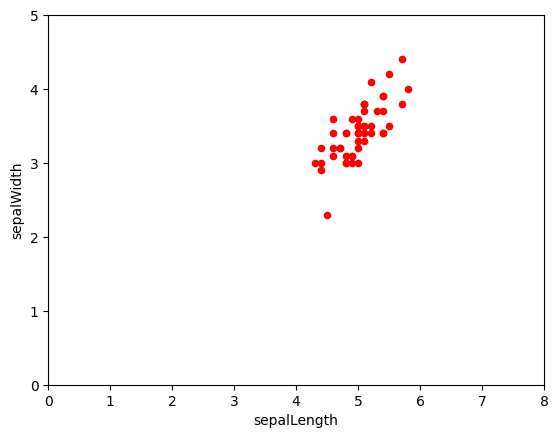

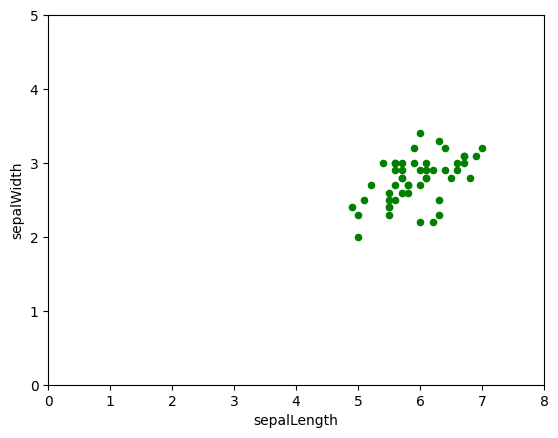

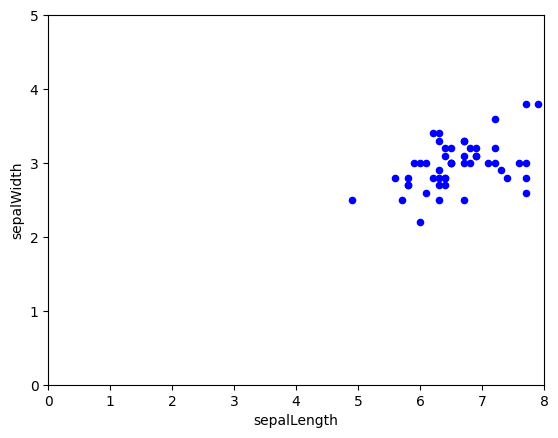

In [4]:
kwargs = dict(color='r', xlim=(0,8), ylim=(0,5))
setosa.plot(kind='scatter', x='sepalLength', y='sepalWidth', **kwargs)
kwargs = dict(color='g', xlim=(0,8), ylim=(0,5))
versicolor.plot(kind='scatter', x='sepalLength', y='sepalWidth', **kwargs)
kwargs = dict(color='b', xlim=(0,8), ylim=(0,5))
virginica.plot(kind='scatter', x='sepalLength', y='sepalWidth', **kwargs)

In [40]:
# now onto clustering. We'll set the number of clusters to be the number of classes

k = len(iris.species.unique())

kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=999999999, n_init=10, random_state=42)
X = iris[['sepalWidth','sepalLength','petalWidth','petalWidth']].values
y = kmeans.fit_predict(X)

In [41]:
kmeans.cluster_centers_

array([[2.72857143, 5.82857143, 1.40178571, 1.40178571],
       [3.428     , 5.006     , 0.246     , 0.246     ],
       [3.05454545, 6.81363636, 2.025     , 2.025     ]])

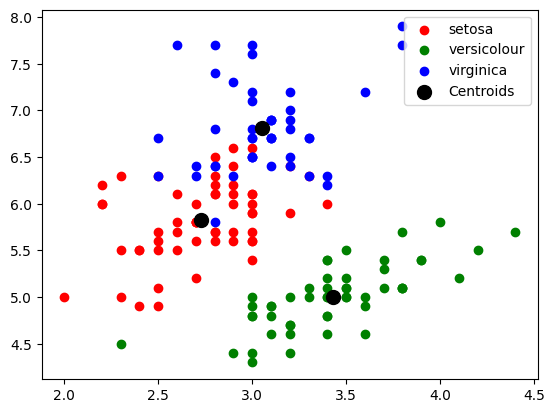

In [42]:
cols = iris.columns 
plt.scatter(X[y == 0, 0], 
            X[y == 0, 1], 
            c='red', 
            label='setosa') 
plt.scatter(X[y == 1, 0], 
            X[y == 1, 1], 
            c='green', 
            label='versicolour') 
plt.scatter(X[y == 2, 0], 
            X[y == 2, 1], 
            c='blue', 
            label='virginica') 

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=100, label='Centroids')
  
plt.legend() 